# About Dataset (MetroPT3)

This dataset include values of pressure , temparature , motor current , air intake valves , etc collected from Air Pressure Unit (APU) of a metro train. The datasetc consist of 15169480 data points collected at 1Hz from february to august 2020. Data is measure from 7 analog and 8 digital sensors.


In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df0 = pd.read_csv('/Users/maulikthakkar/Downloads/MetroPT3.csv')
df0.columns



Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

The given dataset has one unnamed collumn which is not required and can be dropped.

In [2]:
df = df0.drop(columns='Unnamed: 0');
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

**Columns Present**

1) TP2(bar) : The pressure on the compressor.

2) TP3(bar) : The pressure at pneumatic pannel.

3) H1(bar)  : The pressure generated as a result of pressure drop when the cyclonic separator filter    discharges.

4) DV Pressure(bar) : The pressure drop caused as the towers discharge air dryers; a zero value indicates that the compressor is working under load.

5) Reservoirs(bar) : The downstream reservoir pressure, which should be close to the pneumatic panel pressure (TP3).

6) Motor Current (A) : The current of one phase of a three-phase motor is measured; it displays values close to 0A when turned off, 4A while working offloaded, 7A when operating under load, and 9A when it starts functioning.

7) Oil temperature (celcius) : Oil temparature on the compressor.

8) COMP : the electrical signal of the compressor's air intake valve; it is active when there is no air intake, indicating that the compressor has been turned off or is working in an offloaded mode.

9) DV electric : the electrical signal that regulates the compressor outlet valve; it is active when the compressor is loaded and inactive when the compressor is turned off or in an offloaded state.

10) Towers : the electrical signal that defines the tower in charge of drying the air and the tower in charge of draining the humidity removed from the air; while not active, it indicates that tower one is in operation; when active, it indicates that tower two is in operation.

11) MPG : When the pressure in the air production unit (APU) falls below 8.2 bar, the electrical signal responsible for starting the compressor under load by activating the intake valve; it triggers the COMP sensor, which behaves similarly to the MPG sensor.

12) LPS : the electrical signal that detects and activates when the pressure drops below 7 bars.

13) Pressure Switch : The electrical signal that detects the discharge in the air-drying towers.

14) Oil Level : the electrical signal that monitors the compressor's oil level; it is active when the oil level falls below the expected levels.

15) Caudal Impulse : the electrical signal generated by the absolute amount of air going from the APU to the reservoirs.

--> We should also check for NULL values in the dataset.

In [3]:
df.isnull().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

Here we can see that the dataset has no NULL values.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TP2,1516948.0,1.367826,3.250930,-0.032,-0.014,-0.012,-0.0100,10.676
TP3,1516948.0,8.984611,0.639095,0.730,8.492,8.960,9.4920,10.302
H1,1516948.0,7.568155,3.333200,-0.036,8.254,8.784,9.3740,10.288
DV_pressure,1516948.0,0.055956,0.382402,-0.032,-0.022,-0.020,-0.0180,9.844
Reservoirs,1516948.0,8.985233,0.638307,0.712,8.494,8.960,9.4920,10.300
Oil_temperature,1516948.0,62.644182,6.516261,15.400,57.775,62.700,67.2500,89.050
Motor_current,1516948.0,2.050171,2.302053,0.020,0.040,0.045,3.8075,9.295
COMP,1516948.0,0.836957,0.369405,0.000,1.000,1.000,1.0000,1.000
DV_eletric,1516948.0,0.160611,0.367172,0.000,0.000,0.000,0.0000,1.000
Towers,1516948.0,0.919848,0.271528,0.000,1.000,1.000,1.0000,1.000


--> Among the data of analog sensors , 
   - TP2 , TP3 , H1 , DV_pressure , Reservoir and Motor_current varies in the range 0 to 10.
   - Only Oil temerature varies in the range 6 to 89 celsius.
   - We can also visualize the same using box plots.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

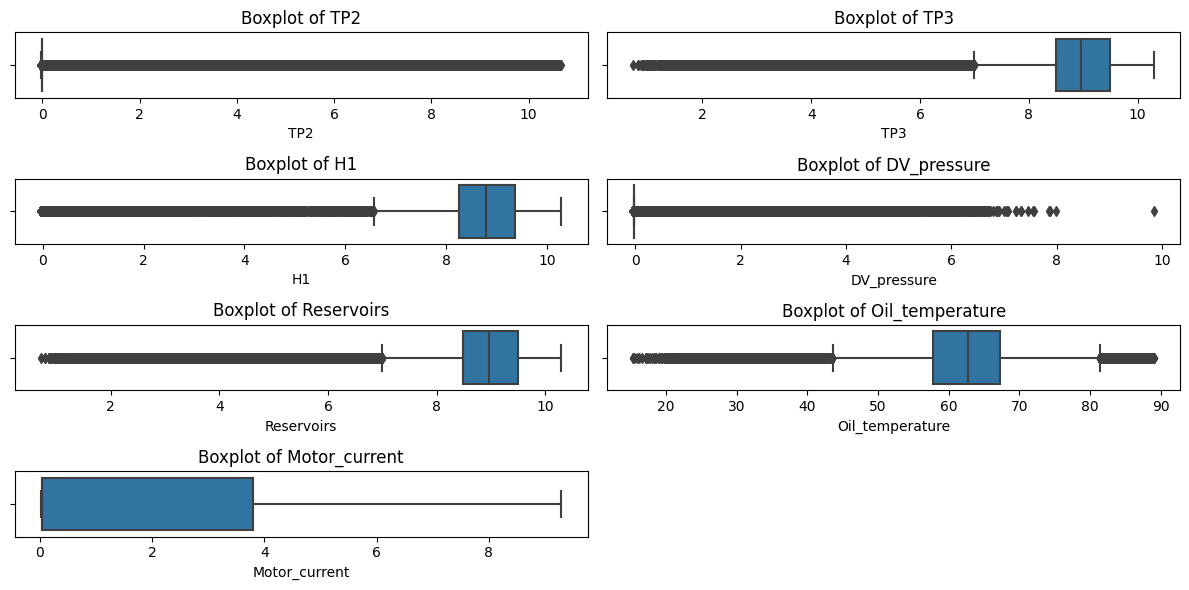

In [25]:

df_box_plot = df[['TP2' , 'TP3' ,'H1' , 'DV_pressure' , 'Reservoirs' , 'Oil_temperature' , 'Motor_current']].copy()

num_cols = len(df_box_plot.columns)
num_rows = (num_cols + 1)//2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6))
axes = axes.flatten()

  
for i, col in enumerate(df_box_plot.columns):
    sns.boxplot(data=df_box_plot, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')


for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


In [5]:
df.dtypes

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

--> Here we can see that all the readings are in float64 datatype except timestamp.
--> timestamp is of object type so we should convert it to datetime format.

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"]);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Figure size 1300x1700 with 0 Axes>

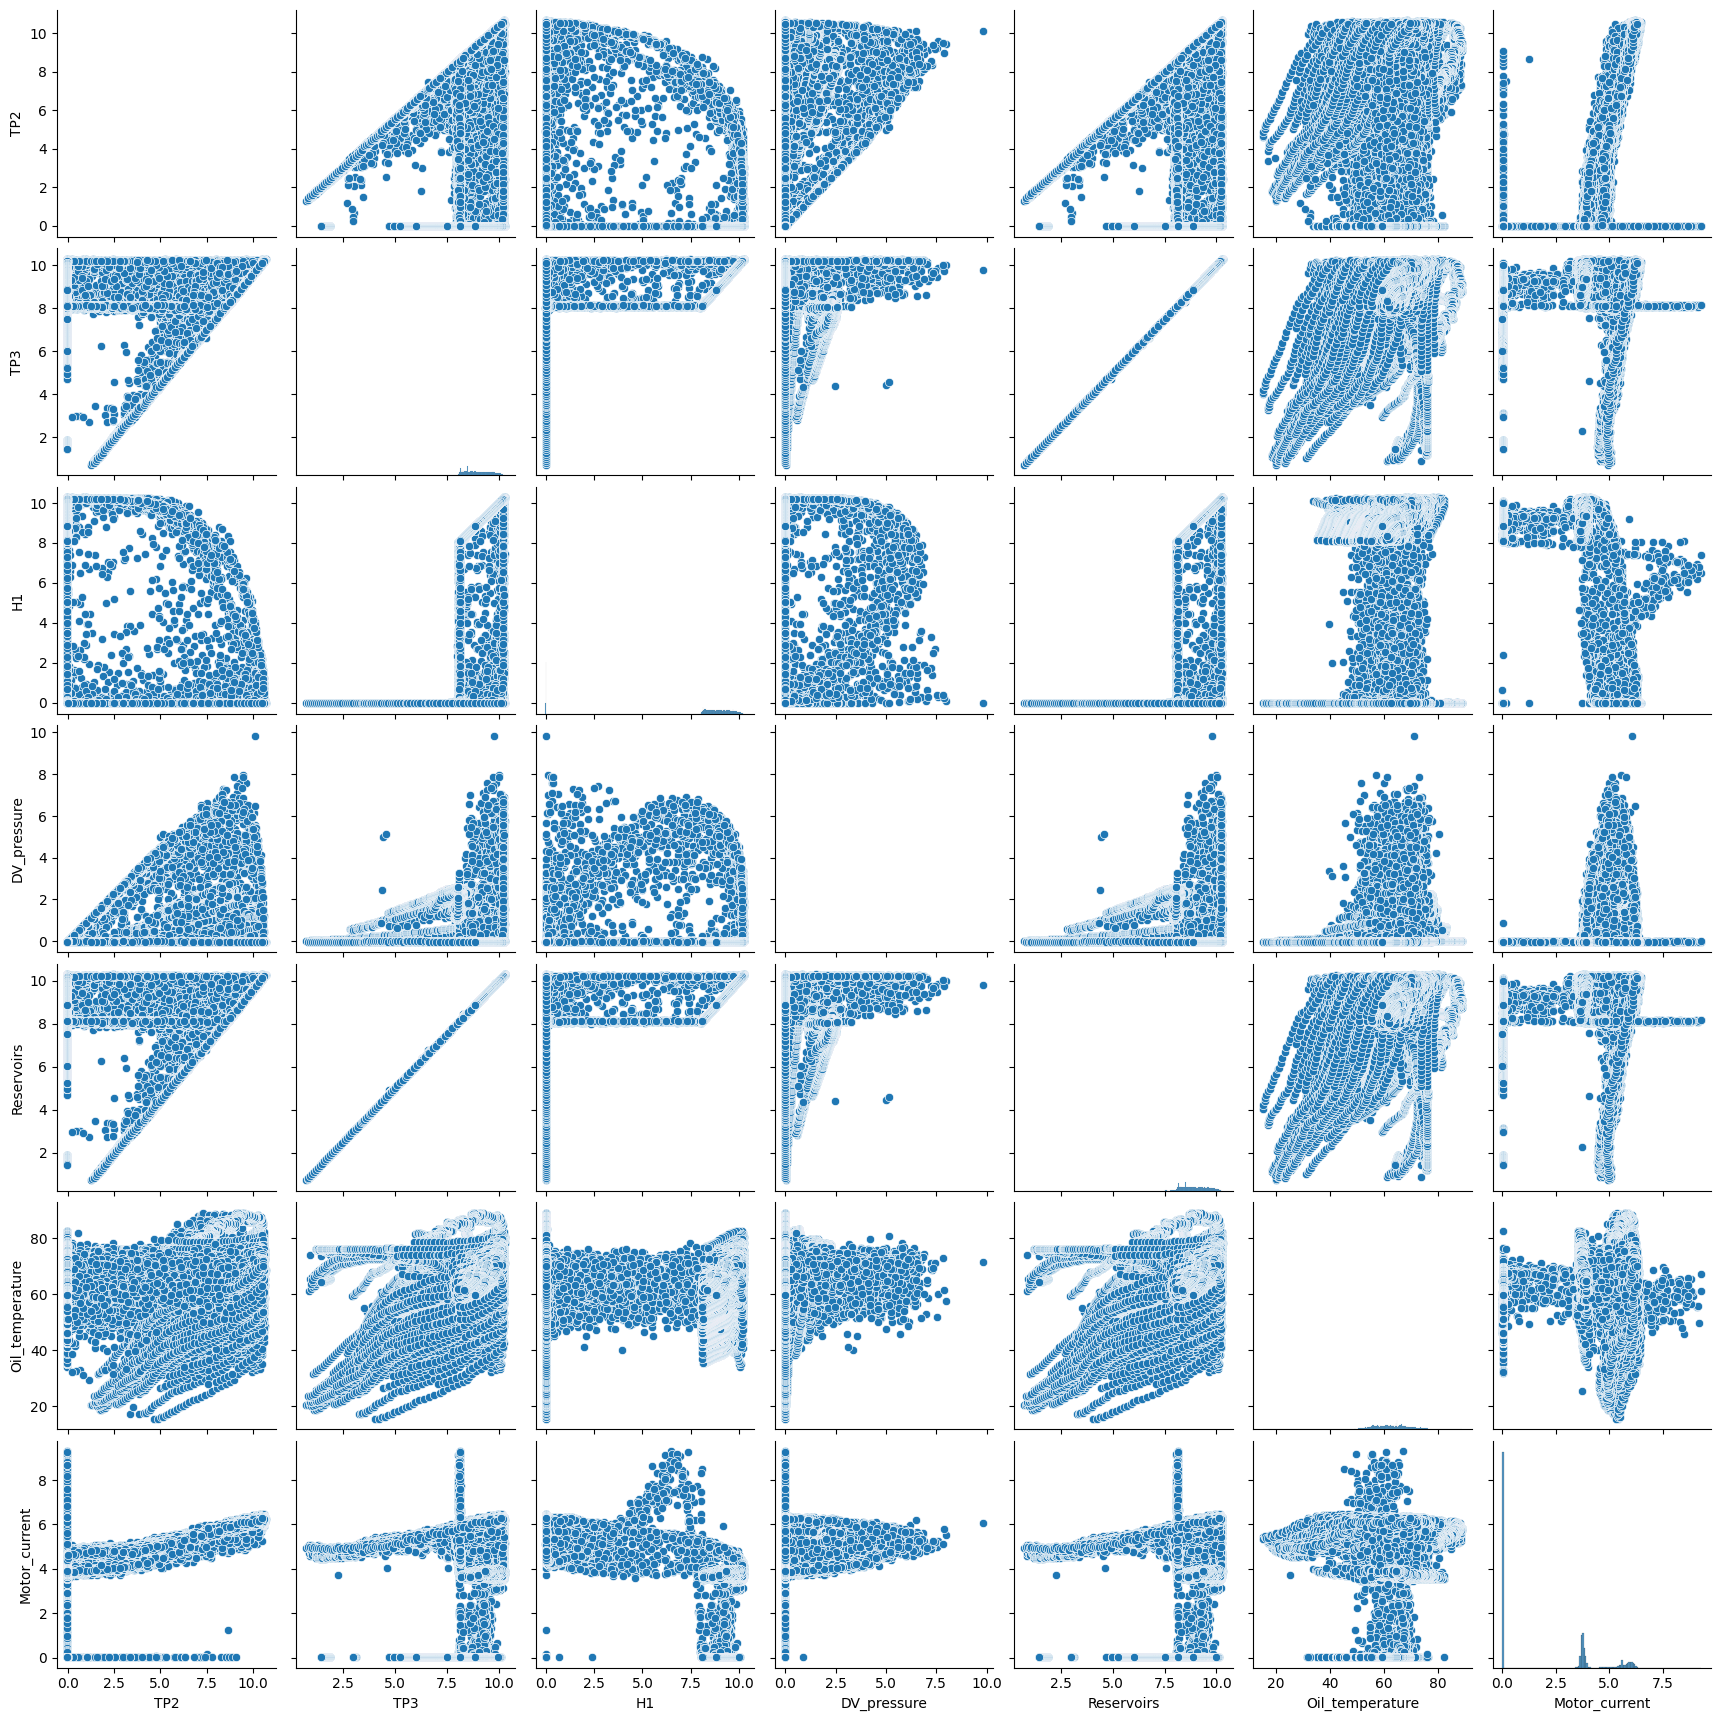

In [33]:
df_pair_plot = df[['TP2' , 'TP3' ,'H1' , 'DV_pressure' , 'Reservoirs' , 'Oil_temperature' , 'Motor_current']].copy()
plt.figure(figsize=(13,17))
sns.pairplot(df_pair_plot )
plt.show()

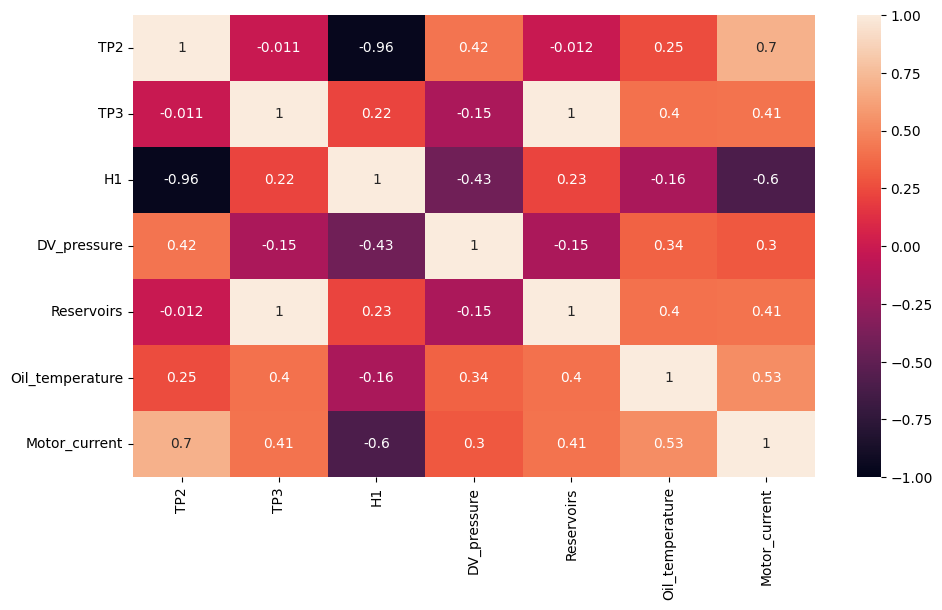

In [35]:
plt.figure(figsize=(11, 6))
sns.heatmap(df_pair_plot.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()